In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import ticker
import numpy as np

In [21]:
database = r"E:\Desenvolvimento\Teste\acumulado_MT.xlsx"

# Área dos formigueiros

Realizar a leitura da base de dados

In [22]:
dataset_initial = pd.read_excel(database)

Separar a base de dados, deixando apens os campos que serão utilizados.  
Remover pontos de GPS sem ninhos.  
Remover linhas com valores vazios.

In [23]:
dataset = dataset_initial[['VL_LARG','VL_COMP','ID_CONDI','ID_ESPECIE']]
dataset = dataset.loc[dataset['ID_CONDI'] != 0]
dataset = dataset.dropna()

In [24]:
dataset

,VL_LARG,VL_COMP,ID_CONDI,ID_ESPECIE
0,30.00,3.0,2,1
1,22.00,25.0,1,1
2,21.00,13.0,1,1
3,21.00,18.0,1,4
4,20.00,1.0,1,3
...,...,...,...,...
14770,0.02,1.0,1,3
14771,0.01,1.0,1,3
14772,0.01,1.0,1,3
17362,0.00,0.8,1,1


Define o grupo de formiga com base na espécie.

In [25]:
especie_grupo = {
    0:0,
    1:1,
    2:2,
    3:3,
    4:1,
    5:1,
    6:2
}

def escolhe_grupo(especie:int):
    '''
    # Método Escolhe Grupo
    Retorna o código do grupo de formiga.

    ::

        especie[int] -> return int
    '''
    return especie_grupo[especie]

In [26]:
dataset['ID_GRUPO'] = dataset['ID_ESPECIE'].apply(lambda x: escolhe_grupo(x))

Remove a coluna espécie após a criação do grupo.

In [27]:
dataset.drop('ID_ESPECIE', axis=1)

,VL_LARG,VL_COMP,ID_CONDI,ID_GRUPO
0,30.00,3.0,2,1
1,22.00,25.0,1,1
2,21.00,13.0,1,1
3,21.00,18.0,1,1
4,20.00,1.0,1,3
...,...,...,...,...
14770,0.02,1.0,1,3
14771,0.01,1.0,1,3
14772,0.01,1.0,1,3
17362,0.00,0.8,1,1


Retorna os valores distintos dos grupos.

In [28]:
unique_grupo = dataset['ID_GRUPO'].unique()

In [29]:
unique_grupo.sort()

In [30]:
nome_grupo = {
    1:'Saúva',
    2:'Quenquem',
    3:'Olheiro alimentação',
}

Cria o campo de tamanho em m² do ninho.

In [31]:
dataset = dataset.assign(vl_area_f = dataset['VL_LARG'] * dataset['VL_COMP'])

In [32]:
dataset.shape

(14775, 6)

In [33]:
dataset

,VL_LARG,VL_COMP,ID_CONDI,ID_ESPECIE,ID_GRUPO,vl_area_f
0,30.00,3.0,2,1,1,90.00
1,22.00,25.0,1,1,1,550.00
2,21.00,13.0,1,1,1,273.00
3,21.00,18.0,1,4,1,378.00
4,20.00,1.0,1,3,3,20.00
...,...,...,...,...,...,...
14770,0.02,1.0,1,3,3,0.02
14771,0.01,1.0,1,3,3,0.01
14772,0.01,1.0,1,3,3,0.01
17362,0.00,0.8,1,1,1,0.00


In [34]:
dataset.describe()

,VL_LARG,VL_COMP,ID_CONDI,ID_ESPECIE,ID_GRUPO,vl_area_f
count,14775.000000,14775.000000,14775.000000,14775.000000,14775.000000,14775.000000
mean,3.292962,3.402983,1.034653,2.056244,1.179898,19.155939
std,3.178712,3.413190,0.182906,1.410722,0.550412,34.497719
min,0.000000,0.100000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,5.000000
75%,5.000000,5.000000,1.000000,4.000000,1.000000,20.325000
max,30.000000,27.000000,2.000000,6.000000,3.000000,550.000000


In [35]:
unique_grupo

array([1, 2, 3], dtype=int64)

In [36]:
num_charts = len(unique_grupo)

In [37]:
dataset.sort_values(by='VL_LARG',axis=0)

,VL_LARG,VL_COMP,ID_CONDI,ID_ESPECIE,ID_GRUPO,vl_area_f
20497,0.00,0.5,1,4,1,0.00
17362,0.00,0.8,1,1,1,0.00
14771,0.01,1.0,1,3,3,0.01
14772,0.01,1.0,1,3,3,0.01
14769,0.02,1.0,1,3,3,0.02
...,...,...,...,...,...,...
39,20.00,1.0,1,3,3,20.00
3,21.00,18.0,1,4,1,378.00
2,21.00,13.0,1,1,1,273.00
1,22.00,25.0,1,1,1,550.00


Realiza o calculo para determinar quanto desproporcional o ninho se encontra.

In [38]:
dataset = dataset.assign(DISTANCE_FROM_INITIAL_POINT= abs(dataset['VL_LARG'] - dataset['VL_COMP']))

In [39]:
dataset.sort_values('DISTANCE_FROM_INITIAL_POINT', ascending=False)

,VL_LARG,VL_COMP,ID_CONDI,ID_ESPECIE,ID_GRUPO,vl_area_f,DISTANCE_FROM_INITIAL_POINT
0,30.0,3.0,2,1,1,90.0,27.0
30,20.0,1.0,1,3,3,20.0,19.0
32,20.0,1.0,1,3,3,20.0,19.0
33,20.0,1.0,1,3,3,20.0,19.0
34,20.0,1.0,1,3,3,20.0,19.0
...,...,...,...,...,...,...,...
9494,1.0,1.0,1,1,1,1.0,0.0
9493,1.0,1.0,1,1,1,1.0,0.0
9490,1.0,1.0,1,1,1,1.0,0.0
9489,1.0,1.0,1,1,1,1.0,0.0


Plota os gráficos para todos os grupos.

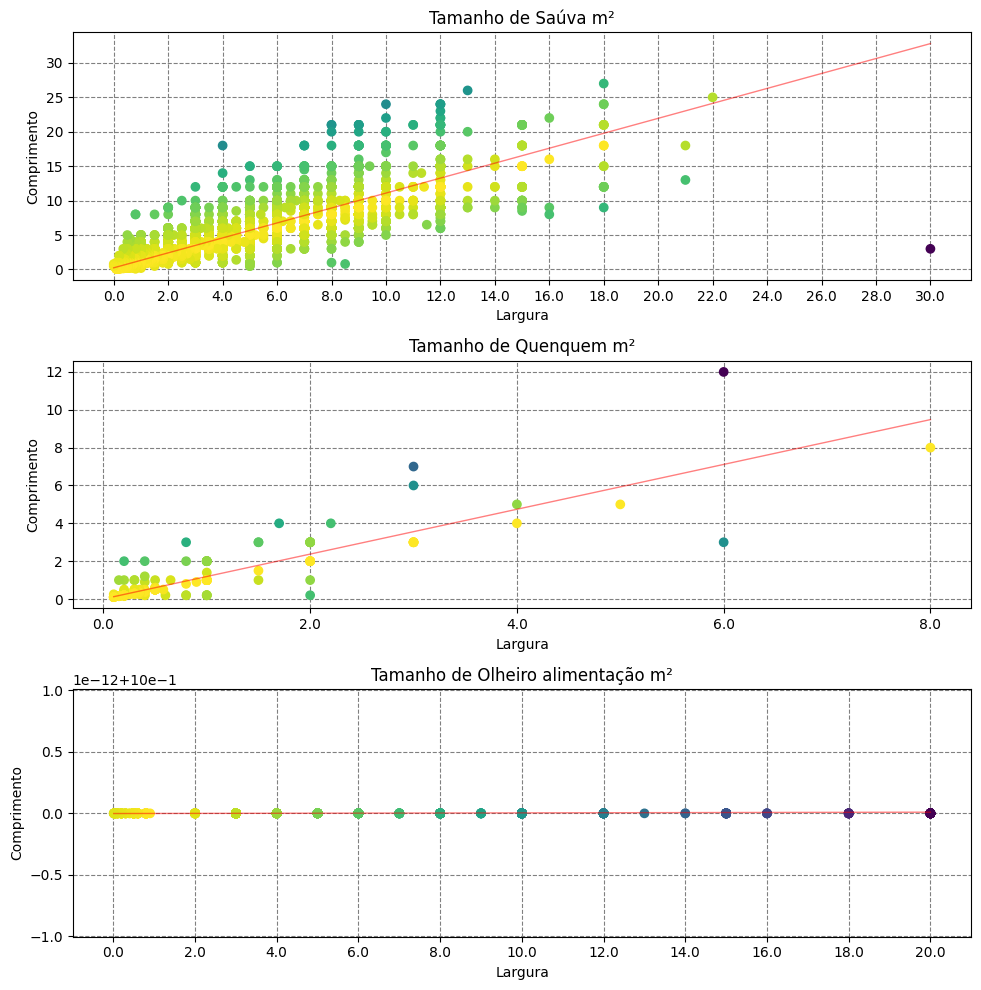

In [40]:
fig, ax = plt.subplots(num_charts)
fig.set_size_inches(10, 10)
for index, grupo in enumerate(unique_grupo):
    dataset_filter = dataset.loc[dataset['ID_GRUPO'] == grupo]

    max = dataset_filter['VL_COMP'].max() if dataset_filter['VL_COMP'].max() > dataset_filter['VL_LARG'].max() else dataset_filter['VL_LARG'].max()
    start, end = (0, max+1)
    ax[index].xaxis.set_ticks(np.arange(start, end, 2))
    ax[index].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    
    ax[index].set_axisbelow(True)

    ax[index].set_xlabel('Largura')
    ax[index].set_ylabel('Comprimento')

    ax[index].grid(linestyle='dashed', color='gray')

    ax[index].scatter(x=dataset_filter['VL_LARG'], y=dataset_filter['VL_COMP'], c=dataset_filter['DISTANCE_FROM_INITIAL_POINT'], cmap="viridis_r", alpha=1)
    ax[index].set_title(f"Tamanho de {nome_grupo[grupo]} m²")

    z = np.polyfit(dataset_filter['VL_LARG'], dataset_filter['VL_COMP'], 1)
    p = np.poly1d(z)

    ax[index].plot(dataset_filter['VL_LARG'], p(dataset_filter['VL_LARG']), linewidth=1, color='red', alpha=0.5)
    fig.tight_layout()

plt.savefig(f'mining.pdf', dpi=300)
